In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [2]:
df=pd.read_csv("Readmissions and Deaths - Hospital.csv",encoding='latin1')

In [3]:
df.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name    Measure ID  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2  Death rate for chronic obstructive pulmonary d...  MORT_30_COPD   
3           Heart failure (HF) 30-Day Mortality Rate    MORT_30_HF   
4               Pneumonia (PN) 30-Day Mortality Rate    MORT_30_PN   

                  Compared to National Denominator Score Lower Estimate  \
0  No Different than the National Rate         733  12.5           10.6   
1  No Different than the National Rate         278   4.2            2.6   
2  No Different than the National Rate         586   9.3            7.3   
3  No Different than the National Rate         797  12.4           10.4   
4  No Different than the National Rate         599  15.5           13.0   

  Higher Estimate Footnote Measure Start Date Measure End Date  
0            14.9      NaN         07/01/2012       06/30/2015  
1             6.8      NaN         07/01/2012       06/30/2015  
2            11.8      NaN         07/01/2012       06/30/2015  
3            14.6      NaN         07/01/2012       06/30/2015  
4            18.5      NaN         07/01/2012       06/30/2015

In [4]:
df.shape

(67452, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
Provider ID             67452 non-null int64
Hospital Name           67452 non-null object
Address                 67452 non-null object
City                    67452 non-null object
State                   67452 non-null object
ZIP Code                67452 non-null int64
County Name             67242 non-null object
Phone Number            67452 non-null int64
Measure Name            67452 non-null object
Measure ID              67452 non-null object
Compared to National    67452 non-null object
Denominator             67452 non-null object
Score                   67452 non-null object
Lower Estimate          67452 non-null object
Higher Estimate         67452 non-null object
Footnote                25742 non-null object
Measure Start Date      67452 non-null object
Measure End Date        67452 non-null object
dtypes: int64(3), object(15)
memory usage: 9.3+ MB


In [6]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID              0.00
Hospital Name            0.00
Address                  0.00
City                     0.00
State                    0.00
ZIP Code                 0.00
County Name              0.31
Phone Number             0.00
Measure Name             0.00
Measure ID               0.00
Compared to National     0.00
Denominator              0.00
Score                    0.00
Lower Estimate           0.00
Higher Estimate          0.00
Footnote                61.84
Measure Start Date       0.00
Measure End Date         0.00
dtype: float64

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [7]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(67452, 17)

In [8]:
df=df.dropna(axis=0, how='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67242 entries, 0 to 67395
Data columns (total 17 columns):
Provider ID             67242 non-null int64
Hospital Name           67242 non-null object
Address                 67242 non-null object
City                    67242 non-null object
State                   67242 non-null object
ZIP Code                67242 non-null int64
County Name             67242 non-null object
Phone Number            67242 non-null int64
Measure Name            67242 non-null object
Measure ID              67242 non-null object
Compared to National    67242 non-null object
Denominator             67242 non-null object
Score                   67242 non-null object
Lower Estimate          67242 non-null object
Higher Estimate         67242 non-null object
Measure Start Date      67242 non-null object
Measure End Date        67242 non-null object
dtypes: int64(3), object(14)
memory usage: 9.2+ MB


In [10]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67242 entries, 0 to 67395
Data columns (total 17 columns):
Provider ID             67242 non-null int64
Hospital Name           67242 non-null object
Address                 67242 non-null object
City                    67242 non-null object
State                   67242 non-null object
ZIP Code                67242 non-null int64
County Name             67242 non-null object
Phone Number            67242 non-null int64
Measure Name            67242 non-null object
Measure ID              67242 non-null object
Compared to National    67242 non-null object
Denominator             67242 non-null object
Score                   67242 non-null object
Lower Estimate          67242 non-null object
Higher Estimate         67242 non-null object
Measure Start Date      67242 non-null object
Measure End Date        67242 non-null object
dtypes: int64(3), object(14)
memory usage: 9.2+ MB


### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [11]:
df=df[~(df["Score"].isin(['Not Applicable','Not Available']))]

In [12]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41645 entries, 0 to 67323
Data columns (total 13 columns):
Provider ID             41645 non-null int64
Hospital Name           41645 non-null object
ZIP Code                41645 non-null int64
County Name             41645 non-null object
Measure Name            41645 non-null object
Measure ID              41645 non-null object
Compared to National    41645 non-null object
Denominator             41645 non-null object
Score                   41645 non-null object
Lower Estimate          41645 non-null object
Higher Estimate         41645 non-null object
Measure Start Date      41645 non-null object
Measure End Date        41645 non-null object
dtypes: int64(2), object(11)
memory usage: 4.4+ MB


### Converting some categorical variables to numeric

In [14]:
df = df.replace(['Not Available','Not Applicable'],0)

In [15]:
df['Score'] = df['Score'].apply(pd.to_numeric,errors='coerce')


In [16]:
df=df.fillna(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41645 entries, 0 to 67323
Data columns (total 13 columns):
Provider ID             41645 non-null int64
Hospital Name           41645 non-null object
ZIP Code                41645 non-null int64
County Name             41645 non-null object
Measure Name            41645 non-null object
Measure ID              41645 non-null object
Compared to National    41645 non-null object
Denominator             41645 non-null object
Score                   41645 non-null float64
Lower Estimate          41645 non-null object
Higher Estimate         41645 non-null object
Measure Start Date      41645 non-null object
Measure End Date        41645 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 4.4+ MB


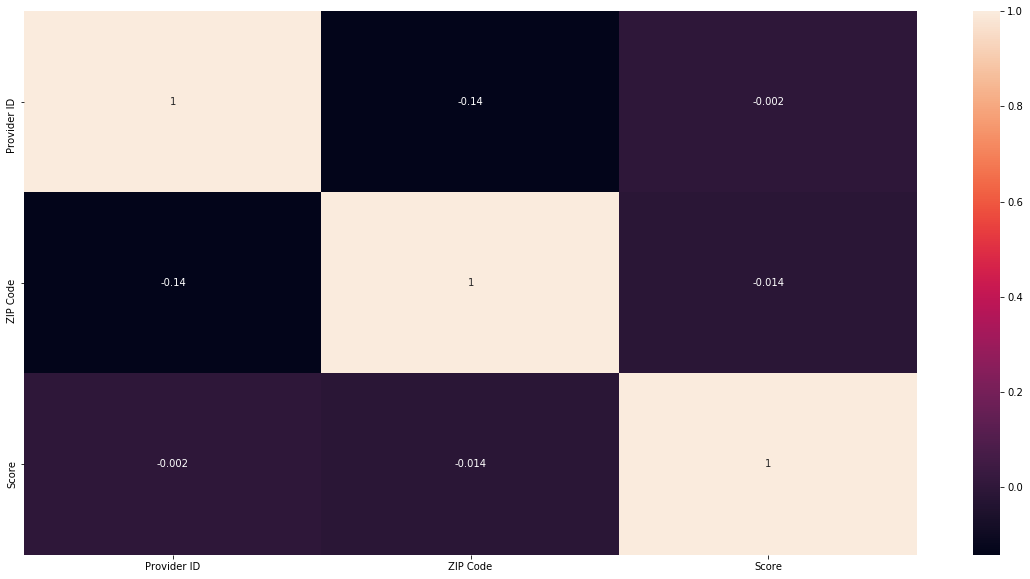

In [18]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [19]:
## Droppng Columns with high correlation -
df = df.drop(['Lower Estimate', 'Higher Estimate'], axis=1)

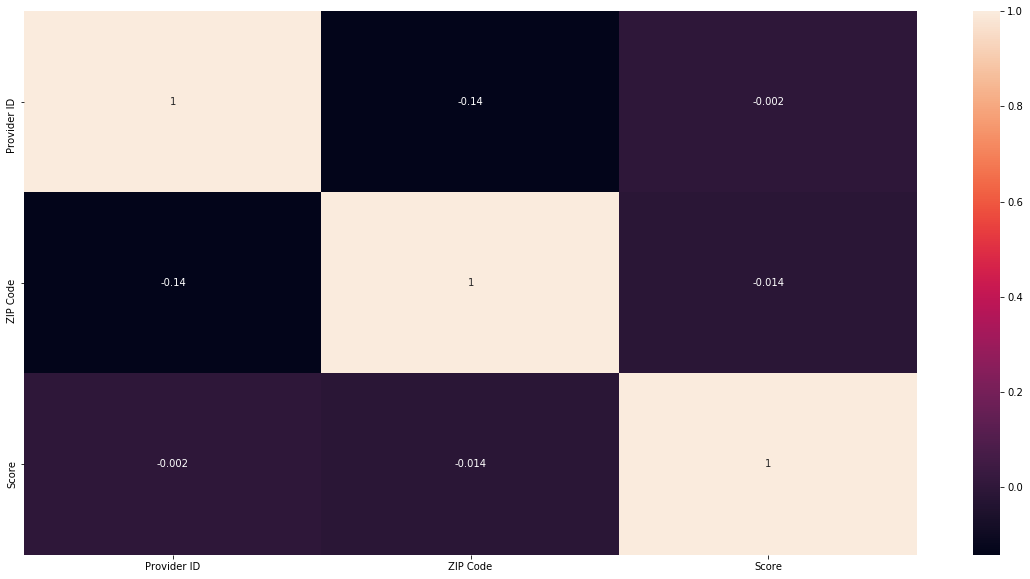

In [20]:
# Let's see the correlation matrix again
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [21]:
df.to_csv('Readmissions and Deaths.csv')

In [22]:
RnDeaths = df[:]
RnDeaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41645 entries, 0 to 67323
Data columns (total 11 columns):
Provider ID             41645 non-null int64
Hospital Name           41645 non-null object
ZIP Code                41645 non-null int64
County Name             41645 non-null object
Measure Name            41645 non-null object
Measure ID              41645 non-null object
Compared to National    41645 non-null object
Denominator             41645 non-null object
Score                   41645 non-null float64
Measure Start Date      41645 non-null object
Measure End Date        41645 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 3.8+ MB


## Read 'Readmissions and Deaths.csv' and get only mortality features to get group score

In [23]:
#Mort_read_df = pd.read_csv(r'C:\Users\Preethi\Downloads\Cleaned files (2)\Cleaned files\Readmissions and Deaths.csv', index_col = 0)

In [24]:
df.head()

Provider ID                     Hospital Name  ZIP Code County Name  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER     36301     HOUSTON   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER     36301     HOUSTON   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER     36301     HOUSTON   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER     36301     HOUSTON   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER     36301     HOUSTON   

                                        Measure Name    Measure ID  \
0  Acute Myocardial Infarction (AMI) 30-Day Morta...   MORT_30_AMI   
1                                Death rate for CABG  MORT_30_CABG   
2  Death rate for chronic obstructive pulmonary d...  MORT_30_COPD   
3           Heart failure (HF) 30-Day Mortality Rate    MORT_30_HF   
4               Pneumonia (PN) 30-Day Mortality Rate    MORT_30_PN   

                  Compared to National Denominator  Score Measure Start Date  \
0  No Different than the National Rate         733   12.5         07/01/2012   
1  No Different than the National Rate         278    4.2         07/01/2012   
2  No Different than the National Rate         586    9.3         07/01/2012   
3  No Different than the National Rate         797   12.4         07/01/2012   
4  No Different than the National Rate         599   15.5         07/01/2012   

  Measure End Date  
0       06/30/2015  
1       06/30/2015  
2       06/30/2015  
3       06/30/2015  
4       06/30/2015

In [25]:
Mort_read_df = df.copy()

In [26]:
Mort_read_df.drop(['Hospital Name','ZIP Code','Measure Name','County Name','Compared to National','Denominator','Measure Start Date','Measure End Date'],axis=1,inplace=True)

In [27]:
Mortality_df = Mort_read_df[Mort_read_df['Measure ID'].str.contains("MORT")]

In [28]:
Mortality_df['Measure ID'].unique()

array(['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK'], dtype=object)

In [29]:
# Another feature for Mortality ie 'Death Among Surgical Patients with Serious Treatable Complications' is captured from Complications- Hospital csv.
MORT_30_DASdf = pd.read_csv(r'C:\Users\Preethi\Downloads\Hospital_Revised_FlatFiles_20161110\Complications - Hospital.csv')

In [30]:
MORT_30_DASdf=MORT_30_DASdf[~(MORT_30_DASdf["Score"].isin(['Not Applicable','Not Available']))]

In [31]:
MORT_30_DASdf = MORT_30_DASdf[MORT_30_DASdf['Measure ID']== 'PSI_4_SURG_COMP']
MORT_30_DASdf.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Measure Name', 'Measure ID',
       'Compared to National', 'Denominator', 'Score', 'Lower Estimate',
       'Higher Estimate', 'Footnote', 'Measure Start Date',
       'Measure End Date'],
      dtype='object')

In [32]:
MORT_30_DASdf.drop(['Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Measure Name','Compared to National', 'Denominator', 'Lower Estimate',
       'Higher Estimate', 'Footnote', 'Measure Start Date',
       'Measure End Date'],axis=1,inplace=True)

In [33]:
MORT_30_DASdf.head()

Provider ID       Measure ID   Score
6         10001  PSI_4_SURG_COMP  168.26
17        10005  PSI_4_SURG_COMP  179.05
28        10006  PSI_4_SURG_COMP  198.33
61        10011  PSI_4_SURG_COMP  157.92
83        10016  PSI_4_SURG_COMP  155.98

In [34]:
MORT_30_DASdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1818 entries, 6 to 52795
Data columns (total 3 columns):
Provider ID    1818 non-null int64
Measure ID     1818 non-null object
Score          1818 non-null object
dtypes: int64(1), object(2)
memory usage: 56.8+ KB


In [35]:
MORT_30_DASdf = MORT_30_DASdf.replace(['Not Available','Not Applicable'],0)

In [36]:
MORT_30_DASdf.shape

(1818, 3)

In [37]:
MORT_30_DASdf[MORT_30_DASdf['Score']==0].count()

Provider ID    0
Measure ID     0
Score          0
dtype: int64

### As PSI_4_SURG_COMP measure have very less number of hospitals, not adding it to Mortality group.

In [38]:
Mortality_df = Mortality_df.append(MORT_30_DASdf)

In [39]:
Mortality_df.shape

(19192, 3)

In [40]:
#Loading coefficients of Mortality measures are the following, MORT_30_PN=0.66,MORT_30_AMI=0.48, 
#'MORT_30_CABG'=0.35, 'MORT_30_COPD'= 0.62, 'MORT_30_HF'= 0.74, 'MORT_30_STK'=0.52
# Hence multiplying the respective feature scores with their loading coefficient.

In [41]:
Mortality_df.head()


Provider ID    Measure ID Score
0        10001   MORT_30_AMI  12.5
1        10001  MORT_30_CABG   4.2
2        10001  MORT_30_COPD   9.3
3        10001    MORT_30_HF  12.4
4        10001    MORT_30_PN  15.5

In [42]:
Mortality_df["Score"] = Mortality_df["Score"].apply(pd.to_numeric,errors='coerce')

In [43]:
Mortality_df=Mortality_df.pivot_table(values= 'Score', index= 'Provider ID', columns= 'Measure ID')
Mortality_df.reset_index(inplace=True)
Mortality_df = Mortality_df.rename_axis(None)
Mortality_df.head()

Measure ID  Provider ID  MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  \
0                 10001         12.5           4.2           9.3        12.4   
1                 10005         16.0           NaN           7.6        15.5   
2                 10006         16.7           4.1           7.1        15.6   
3                 10007          NaN           NaN           9.3        14.4   
4                 10008          NaN           NaN           8.2        12.7   

Measure ID  MORT_30_PN  MORT_30_STK  PSI_4_SURG_COMP  
0                 15.5         15.4           168.26  
1                 20.8         15.5           179.05  
2                 18.2         17.9           198.33  
3                 18.8         16.6              NaN  
4                 15.7          NaN              NaN

In [44]:
print(Mortality_df.columns)
print(Mortality_df.shape)

Index(['Provider ID', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP'],
      dtype='object', name='Measure ID')
(4125, 8)


In [45]:
round((Mortality_df.isnull().sum()/Mortality_df.isnull().count())*100,2)

Measure ID
Provider ID         0.00
MORT_30_AMI        42.21
MORT_30_CABG       74.84
MORT_30_COPD       13.07
MORT_30_HF         12.41
MORT_30_PN          1.07
MORT_30_STK        35.22
PSI_4_SURG_COMP    55.93
dtype: float64

In [46]:
Mortality_df.fillna(0, inplace=True)

In [47]:
round((Mortality_df.isnull().sum()/Mortality_df.isnull().count())*100,2)
Mortality_df_copy= Mortality_df.copy()
Mortality_df_copy.to_csv('Mortality_clustering.csv')

In [48]:
Mortality_df.columns

Index(['Provider ID', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP'],
      dtype='object', name='Measure ID')

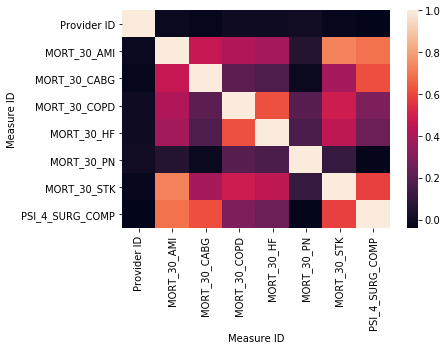

In [49]:
sns.heatmap(Mortality_df.corr())

In [50]:
def factor_loading_weights(factors_list):
    sum_loadings = sum(factors_list)
    factor_weights = []
    for i in factors_list:
        factor = [round(((100/sum_loadings)*i)/100,2)]
        factor_weights.append(factor)
    return factor_weights

In [51]:
factors_list= [0.66,0.48,0.35,0.62,0.74,0.52,0.29]

weights = factor_loading_weights(factors_list)
weights

[[0.18], [0.13], [0.1], [0.17], [0.2], [0.14], [0.08]]

In [52]:
# multiplying measure scores with respective weigts(loading coefficients)
Mortality_df['MORT_30_PN'] = Mortality_df['MORT_30_PN']*0.18
Mortality_df['MORT_30_AMI']= Mortality_df['MORT_30_AMI']*0.13
Mortality_df['MORT_30_CABG']= Mortality_df['MORT_30_CABG']*0.1
Mortality_df['MORT_30_COPD']= Mortality_df['MORT_30_COPD']*0.17
Mortality_df['MORT_30_HF']= Mortality_df['MORT_30_HF']*0.2
Mortality_df['MORT_30_STK']= Mortality_df['MORT_30_STK']*0.14
Mortality_df['PSI_4_SURG_COMP']= Mortality_df['PSI_4_SURG_COMP']*0.08

In [53]:
# Average of the weighted scores to calculated group score.
Mortality_df['Mort_score'] = ((Mortality_df['MORT_30_AMI']+Mortality_df['MORT_30_CABG']+Mortality_df['MORT_30_COPD']+Mortality_df['MORT_30_HF']+Mortality_df['MORT_30_STK']+Mortality_df['MORT_30_PN']+Mortality_df['PSI_4_SURG_COMP'])/7)

In [54]:
Mortality_df.head()

Measure ID  Provider ID  MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  \
0                 10001        1.625          0.42         1.581        2.48   
1                 10005        2.080          0.00         1.292        3.10   
2                 10006        2.171          0.41         1.207        3.12   
3                 10007        0.000          0.00         1.581        2.88   
4                 10008        0.000          0.00         1.394        2.54   

Measure ID  MORT_30_PN  MORT_30_STK  PSI_4_SURG_COMP  Mort_score  
0                2.790        2.156          13.4608    3.501829  
1                3.744        2.170          14.3240    3.815714  
2                3.276        2.506          15.8664    4.079486  
3                3.384        2.324           0.0000    1.452714  
4                2.826        0.000           0.0000    0.965714

In [55]:
Mortality_df.to_csv('Mortality_supervised_model.csv')

In [56]:

!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

Mortality_df_copy.drop(['Provider ID'],axis=1,inplace= True)
Mortality_df_copy.head()

Measure ID  MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  MORT_30_PN  \
0                  12.5           4.2           9.3        12.4        15.5   
1                  16.0           0.0           7.6        15.5        20.8   
2                  16.7           4.1           7.1        15.6        18.2   
3                   0.0           0.0           9.3        14.4        18.8   
4                   0.0           0.0           8.2        12.7        15.7   

Measure ID  MORT_30_STK  PSI_4_SURG_COMP  
0                  15.4           168.26  
1                  15.5           179.05  
2                  17.9           198.33  
3                  16.6             0.00  
4                   0.0             0.00

In [57]:
Mortality_df_copy.corr()

Measure ID       MORT_30_AMI  MORT_30_CABG  MORT_30_COPD  MORT_30_HF  \
Measure ID                                                             
MORT_30_AMI         1.000000      0.465245      0.409490    0.379258   
MORT_30_CABG        0.465245      1.000000      0.208376    0.172016   
MORT_30_COPD        0.409490      0.208376      1.000000    0.620766   
MORT_30_HF          0.379258      0.172016      0.620766    1.000000   
MORT_30_PN          0.060833     -0.010328      0.198790    0.163444   
MORT_30_STK         0.731409      0.388861      0.484095    0.451352   
PSI_4_SURG_COMP     0.688416      0.616144      0.291060    0.244236   

Measure ID       MORT_30_PN  MORT_30_STK  PSI_4_SURG_COMP  
Measure ID                                                 
MORT_30_AMI        0.060833     0.731409         0.688416  
MORT_30_CABG      -0.010328     0.388861         0.616144  
MORT_30_COPD       0.198790     0.484095         0.291060  
MORT_30_HF         0.163444     0.451352         0.244236  
MORT_30_PN         1.000000     0.107617        -0.032053  
MORT_30_STK        0.107617     1.000000         0.587968  
PSI_4_SURG_COMP   -0.032053     0.587968         1.000000

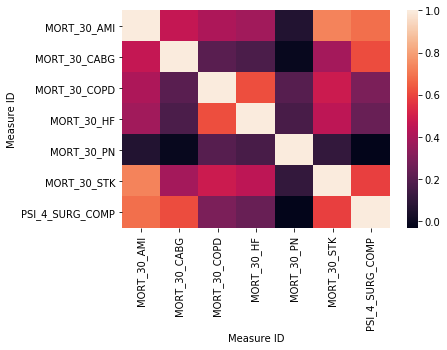

In [58]:
sns.heatmap(Mortality_df_copy.corr())

In [59]:
#Let's check the eigenvalues route as well to find the number of factors
# Create factor analysis object and perform factor analysis with the number of factors equal to the number of columns
fa_Mortality = FactorAnalyzer(rotation = 'varimax',n_factors=1)
fa_Mortality.fit(Mortality_df_copy)
fa_Mortality.loadings_

C:\Users\Preethi\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:626: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


array([[-0.84874345],
       [-0.54028367],
       [-0.56290108],
       [-0.51997281],
       [-0.10909694],
       [-0.82778373],
       [-0.736395  ]])

In [60]:
#let's check the factor variance now to understand 
fa_Mortality.get_factor_variance()

(array([2.83890688]), array([0.40555813]), array([0.40555813]))

In [61]:
Mortality_meandf= pd.DataFrame(Mortality_df_copy.mean())

In [62]:
Mortality_meandf['index1'] = Mortality_meandf.index

In [63]:
Mortality_meandf = Mortality_meandf.rename_axis(None)
Mortality_meandf.rename(columns={'index1':'Measures',0:'mean'},inplace=True)
Mortality_meandf

mean         Measures
MORT_30_AMI       8.126570      MORT_30_AMI
MORT_30_CABG      0.838352     MORT_30_CABG
MORT_30_COPD      7.025818     MORT_30_COPD
MORT_30_HF       10.647903       MORT_30_HF
MORT_30_PN       16.215855       MORT_30_PN
MORT_30_STK       9.671345      MORT_30_STK
PSI_4_SURG_COMP  60.272623  PSI_4_SURG_COMP

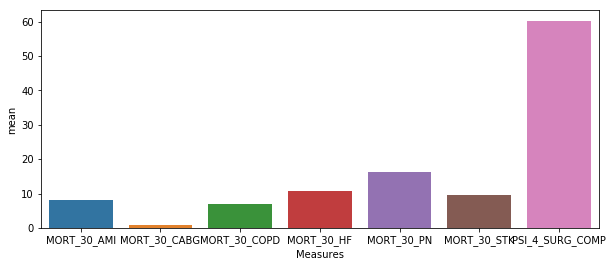

In [64]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(y='mean', x='Measures', data=Mortality_meandf)

## Readmission measures:

In [65]:
Mort_read_df['Measure ID'].unique()

array(['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK'], dtype=object)

In [66]:
Readmission_df = Mort_read_df[Mort_read_df['Measure ID'].str.contains("READM")]

In [67]:
Readmission_df.head()

Provider ID         Measure ID  Score
6         10001       READM_30_AMI   16.5
7         10001      READM_30_CABG   15.1
8         10001      READM_30_COPD   21.1
9         10001        READM_30_HF   21.4
10        10001  READM_30_HIP_KNEE    5.1

In [68]:
Readmission_df=Readmission_df.pivot_table(values= 'Score', index= 'Provider ID', columns= 'Measure ID')
Readmission_df.reset_index(inplace=True)
Readmission_df = Readmission_df.rename_axis(None)

Readmission_df.head()

Measure ID  Provider ID  READM_30_AMI  READM_30_CABG  READM_30_COPD  \
0                 10001          16.5           15.1           21.1   
1                 10005          16.7            NaN           18.0   
2                 10006          16.1           15.2           19.8   
3                 10007           NaN            NaN           19.9   
4                 10008           NaN            NaN           19.2   

Measure ID  READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  READM_30_PN  \
0                  21.4                5.1                15.4         18.7   
1                  21.9                5.7                14.9         16.4   
2                  20.6                5.0                15.4         17.9   
3                  21.1                NaN                16.6         17.3   
4                  23.1                NaN                15.7         16.0   

Measure ID  READM_30_STK  
0                   12.7  
1                   13.4  
2                   12.0  
3                   12.7  
4                    NaN

In [69]:
Readmission_df.fillna(0, inplace=True)

In [70]:
Readmission_df_copy = Readmission_df.copy()
Readmission_df_copy.to_csv('Readmission_clustering.csv')

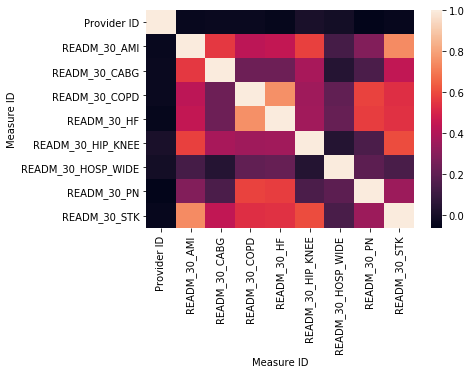

In [71]:
sns.heatmap(Readmission_df.corr())

In [72]:
Readmission_meandf= Readmission_df_copy.drop(['Provider ID'],axis=1,inplace=True)

In [73]:
#Let's check the eigenvalues route as well to find the number of factors
# Create factor analysis object and perform factor analysis with the number of factors equal to the number of columns
fa_Readmission = FactorAnalyzer(rotation = 'varimax',n_factors=1)
fa_Readmission.fit(Readmission_df_copy)
fa_Readmission.loadings_

C:\Users\Preethi\Anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:626: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


array([[-0.76595258],
       [-0.47911942],
       [-0.7329597 ],
       [-0.74066368],
       [-0.59935431],
       [-0.20868003],
       [-0.52062358],
       [-0.83331884]])

In [74]:
Readmission_meandf= pd.DataFrame(Readmission_df_copy.mean())
Readmission_meandf['index1'] = Readmission_meandf.index

In [75]:
Readmission_meandf = Readmission_meandf.rename_axis(None)
Readmission_meandf.rename(columns={'index1':'Measures',0:'mean'},inplace=True)
Readmission_meandf

mean            Measures
READM_30_AMI         8.282520        READM_30_AMI
READM_30_CABG        3.358933       READM_30_CABG
READM_30_COPD       16.525516       READM_30_COPD
READM_30_HF         18.161090         READM_30_HF
READM_30_HIP_KNEE    2.856300   READM_30_HIP_KNEE
READM_30_HOSP_WIDE  15.506810  READM_30_HOSP_WIDE
READM_30_PN         15.857117         READM_30_PN
READM_30_STK         7.428468        READM_30_STK

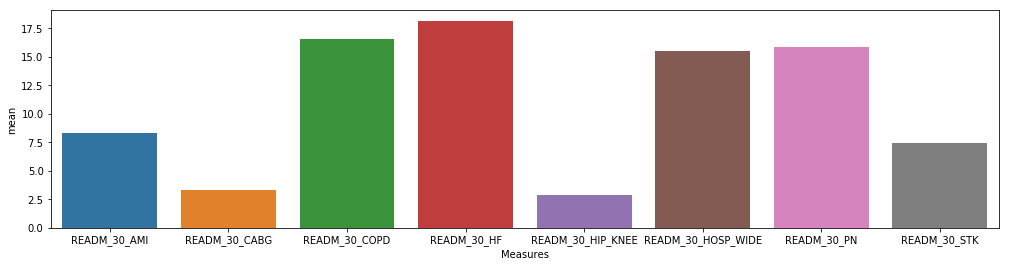

In [76]:
plt.figure(figsize=(17, 4))
ax = sns.barplot(y='mean', x='Measures', data=Readmission_meandf)

In [77]:
# calculating weights using loading coefficients:  READM_30_HOSP_WIDE= 0.94, READM_30_HF= 0.63,  READM_30_PN= 0.61, 
# READM_30_COPD= 0.57, READM_30_AMI= 0.54, READM_30_STK= 0.53, READM_30_HIP_KNEE= 0.42, READM_30_CABG= 0.27

In [78]:
Readmission_df.head()

Measure ID  Provider ID  READM_30_AMI  READM_30_CABG  READM_30_COPD  \
0                 10001          16.5           15.1           21.1   
1                 10005          16.7            0.0           18.0   
2                 10006          16.1           15.2           19.8   
3                 10007           0.0            0.0           19.9   
4                 10008           0.0            0.0           19.2   

Measure ID  READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  READM_30_PN  \
0                  21.4                5.1                15.4         18.7   
1                  21.9                5.7                14.9         16.4   
2                  20.6                5.0                15.4         17.9   
3                  21.1                0.0                16.6         17.3   
4                  23.1                0.0                15.7         16.0   

Measure ID  READM_30_STK  
0                   12.7  
1                   13.4  
2                   12.0  
3                   12.7  
4                    0.0

In [79]:
factors_list= [0.54,0.27,0.57,0.63,0.42,0.94,0.61,0.53]

weights = factor_loading_weights(factors_list)
weights

[[0.12], [0.06], [0.13], [0.14], [0.09], [0.21], [0.14], [0.12]]

In [80]:
# multiplying measure scores with respective weigts(loading coefficients)
Readmission_df['READM_30_AMI'],Readmission_df['READM_30_CABG'],Readmission_df['READM_30_COPD']= Readmission_df['READM_30_AMI']*0.12,Readmission_df['READM_30_CABG']*0.06,Readmission_df['READM_30_COPD']*0.13
Readmission_df['READM_30_HF'],Readmission_df['READM_30_HIP_KNEE'],Readmission_df['READM_30_HOSP_WIDE']= Readmission_df['READM_30_HF']*0.14,Readmission_df['READM_30_HIP_KNEE']*0.09,Readmission_df['READM_30_HOSP_WIDE']*0.21
Readmission_df['READM_30_PN'],Readmission_df['READM_30_STK']= Readmission_df['READM_30_PN']*0.14,Readmission_df['READM_30_STK']*0.12

In [81]:
# Average of the weighted scores to calculated group score
Readmission_df['Readmission_score']= (Readmission_df['READM_30_AMI']+Readmission_df['READM_30_CABG']+Readmission_df['READM_30_COPD']+Readmission_df['READM_30_HF']+Readmission_df['READM_30_HIP_KNEE']+Readmission_df['READM_30_HOSP_WIDE']+Readmission_df['READM_30_PN']+Readmission_df['READM_30_STK'])/8

In [82]:
Readmission_df.head()

Measure ID  Provider ID  READM_30_AMI  READM_30_CABG  READM_30_COPD  \
0                 10001         1.980          0.906          2.743   
1                 10005         2.004          0.000          2.340   
2                 10006         1.932          0.912          2.574   
3                 10007         0.000          0.000          2.587   
4                 10008         0.000          0.000          2.496   

Measure ID  READM_30_HF  READM_30_HIP_KNEE  READM_30_HOSP_WIDE  READM_30_PN  \
0                 2.996              0.459               3.234        2.618   
1                 3.066              0.513               3.129        2.296   
2                 2.884              0.450               3.234        2.506   
3                 2.954              0.000               3.486        2.422   
4                 3.234              0.000               3.297        2.240   

Measure ID  READM_30_STK  Readmission_score  
0                  1.524           2.057500  
1                  1.608           1.869500  
2                  1.440           1.991500  
3                  1.524           1.621625  
4                  0.000           1.408375

In [83]:
Readmission_df.to_csv('Readmission_supervised_model.csv')